In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from numpy.lib.recfunctions import drop_fields

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

import pandas as pd

In [2]:
from utilities import ReadData#, return_diagnosis

data = ReadData('diabetic_data_sel.csv')

#data.diag_1 = return_diagnosis(data.diag_1)
#data.diag_2 = return_diagnosis(data.diag_2)
#data.diag_3 = return_diagnosis(data.diag_3)


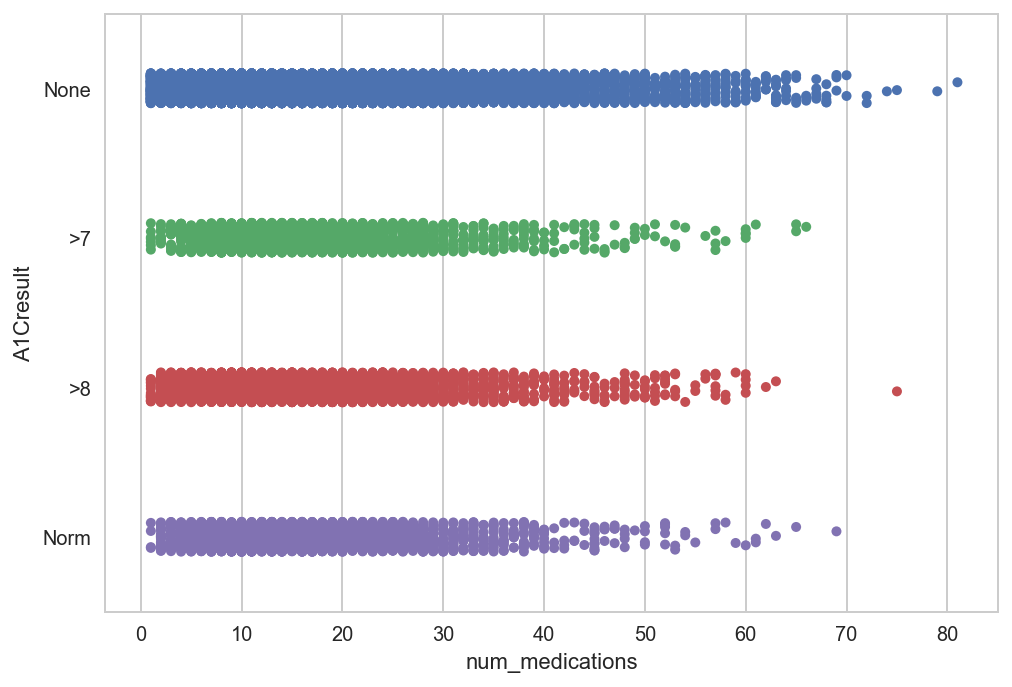

In [3]:
sns.stripplot(x="num_medications", y="A1Cresult", data=data, jitter=True)

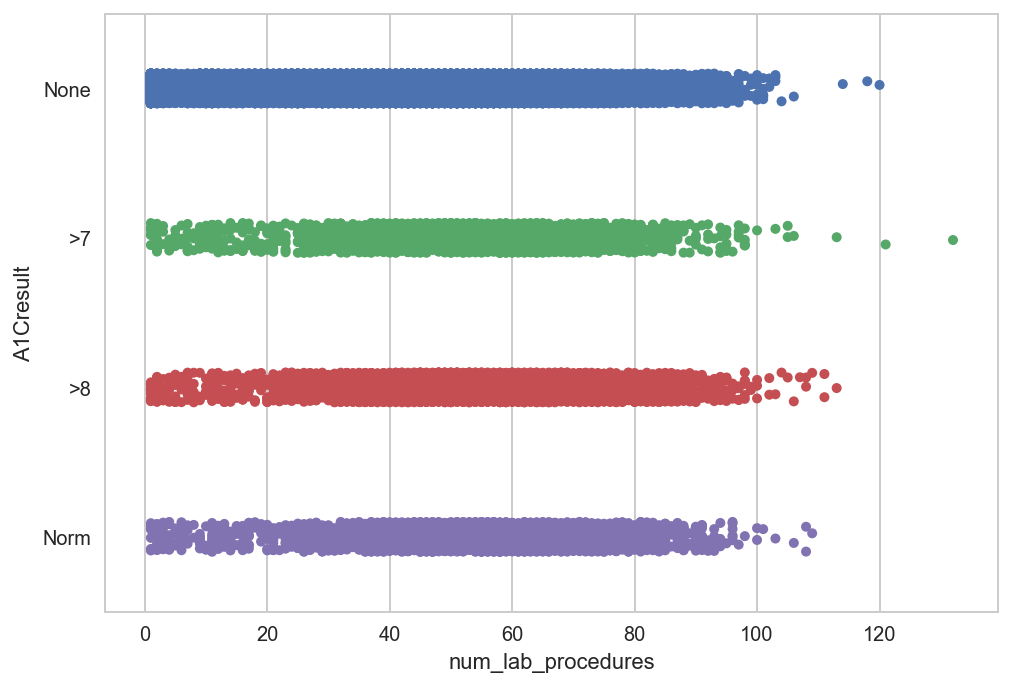

In [4]:
sns.stripplot(x="num_lab_procedures", y="A1Cresult", data=data, jitter=True)

In [5]:
data_rec = data.to_records()
y = data_rec.readmitted
print(data_rec.readmitted)

['NO' '>30' 'NO' ..., '>30' 'NO' 'NO']


In [6]:
for index,val in np.ndenumerate(y):
    if val == "NO" or val == ">30":
        y[index] = "b"
    else:
        y[index] = "r"
        
print(y[y=='b'])

['b' 'b' 'b' ..., 'b' 'b' 'b']


In [7]:
X = drop_fields(data_rec,["encounter_id","patient_nbr","weight","payer_code","readmitted"],asrecarray=True)

In [8]:
from sklearn.utils import murmurhash3_32

def hash_(n, seed=1):
    return murmurhash3_32(n, seed=seed, positive=True)

print(hash_('Caucasian'))

#print(np.unique(X.race))

data.gender.apply(hash_)

#np.apply_along_axis(hash_,0,data.race.astype(str))


3790447291


0        2096670496
1        2096670496
2        2096670496
3         152637185
4         152637185
5         152637185
6         152637185
7         152637185
8        2096670496
9        2096670496
10       2096670496
11        152637185
12       2096670496
13        152637185
14       2096670496
15        152637185
16        152637185
17       2096670496
18        152637185
19        152637185
20       2096670496
21        152637185
22       2096670496
23       2096670496
24       2096670496
25       2096670496
26        152637185
27       2096670496
28        152637185
29       2096670496
            ...    
69944     152637185
69945     152637185
69946     152637185
69947    2096670496
69948     152637185
69949     152637185
69950    2096670496
69951    2096670496
69952     152637185
69953     152637185
69954    2096670496
69955     152637185
69956    2096670496
69957    2096670496
69958     152637185
69959    2096670496
69960    2096670496
69961    2096670496
69962     152637185


In [9]:
medications = ["metformin",
"repaglinide",
"nateglinide",
"chlorpropamide",
"glimepiride",
"acetohexamide",
"glipizide",
"glyburide",
"tolbutamide",
"pioglitazone",
"rosiglitazone",
"acarbose",
"miglitol",
"troglitazone",
"tolazamide",
"examide",
"citoglipton",
"insulin",
"glyburide-metformin",
"glipizide-metformin",
"glimepiride-pioglitazone",
"metformin-rosiglitazone",
"metformin-pioglitazone"]

In [10]:
from sklearn.feature_extraction import FeatureHasher

data_to_hash = data[medications]

#data_to_hash.as_matrix()

#data_to_hash.to_dict().keys()

dict_dat = data_to_hash.to_dict('records')

F = FeatureHasher(10)

X = F.transform(dict_dat)

print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [11]:
data_X = pd.DataFrame(X.toarray())
#print(data_hashed)

data_hashed = data.drop(medications,axis=1)

data_hashed = pd.concat([data_hashed,data_X],axis=1)

print(data_hashed.dtypes)

cols = {n:"medications_hash_{0}".format(n) for n in range(10)}

print(cols)

data_hashed.rename(index=str,columns=cols)

#data_hashed.drop('Unnamed: 0',axis=1)




encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
change                       object
diabetesMed                  object
readmitted                   object
0                           

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,medications_hash_0,medications_hash_1,medications_hash_2,medications_hash_3,medications_hash_4,medications_hash_5,medications_hash_6,medications_hash_7,medications_hash_8,medications_hash_9
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0.0,0.0,-1.0,-3.0,0.0,-1.0,-1.0,-3.0,-3.0,-1.0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0.0,0.0,-1.0,-3.0,0.0,-1.0,-1.0,-2.0,-4.0,-1.0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0.0,0.0,-1.0,-2.0,-1.0,-1.0,-1.0,-3.0,-3.0,-1.0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0.0,0.0,-1.0,-3.0,0.0,-1.0,-1.0,-2.0,-4.0,-1.0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0.0,0.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,0.0,0.0,-1.0,-3.0,0.0,-1.0,-1.0,-1.0,-3.0,-1.0
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,0.0,0.0,-1.0,-3.0,0.0,-1.0,-1.0,0.0,-3.0,-2.0
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,0.0,-1.0,-1.0,-2.0,0.0,-1.0,-1.0,-3.0,-3.0,-1.0
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,0.0,0.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,0.0,0.0,-2.0,-3.0,1.0,-1.0,-1.0,-1.0,-3.0,-1.0


In [12]:

data = ReadData('diabetic_data_sel.csv')
readmitted = data.readmitted

s = pd.Series()

for i in data.index.values:
    val = readmitted[i]
    if val == ">30" or val == "NO":
        s_tmp = pd.Series("otherwise",index=[i])
    else:
        s_tmp = pd.Series("<30",index=[i])
    s = s.append(s_tmp)

data_r = data.drop(["readmitted"],axis=1)
data_r = pd.concat([data_r,s],axis=1)
data_r = data_r.rename(index=str,columns={0:"readmitted"})

In [13]:
from utilities import DataEncoder
DE = DataEncoder()
data_r = DE.DiagnosisCombination(data_r)

In [31]:
medical_specialty = data_r.medical_specialty.value_counts(dropna=False).sort_values()
med_spec = medical_specialty.index.values[-5:-1]

s = pd.Series()

for i,val in data_r.medical_specialty.iteritems():
    if not isinstance(val, str):
        s_tmp = pd.Series("Unknown",index=[i])
    elif val in med_spec:
        s_tmp = pd.Series(val,index=[i])
    else:
        s_tmp = pd.Series("Other",index=[i])
    s = s.append(s_tmp)

data_r1 = data_r.drop("medical_specialty",axis=1)
data_r1 = pd.concat([data_r1,s],axis=1)
#data_r1 = data_r1.rename(index=str,columns={0:"medical_specialty"})


In [49]:
data_r1 = data_r1.rename(index=str,columns={0:"medical_specialty"})
print(data_r1.medical_specialty)

0                         Other
1                       Unknown
2                       Unknown
3                       Unknown
4                       Unknown
5                       Unknown
6                       Unknown
7                       Unknown
8                       Unknown
9              InternalMedicine
10                      Unknown
11                      Unknown
12       Family/GeneralPractice
13       Family/GeneralPractice
14                      Unknown
15                      Unknown
16                      Unknown
17                   Cardiology
18                      Unknown
19                      Unknown
20                      Unknown
21                      Unknown
22                      Unknown
23                      Unknown
24                      Unknown
25                      Unknown
26                   Cardiology
27                        Other
28                      Unknown
29                   Cardiology
                  ...          
69944   

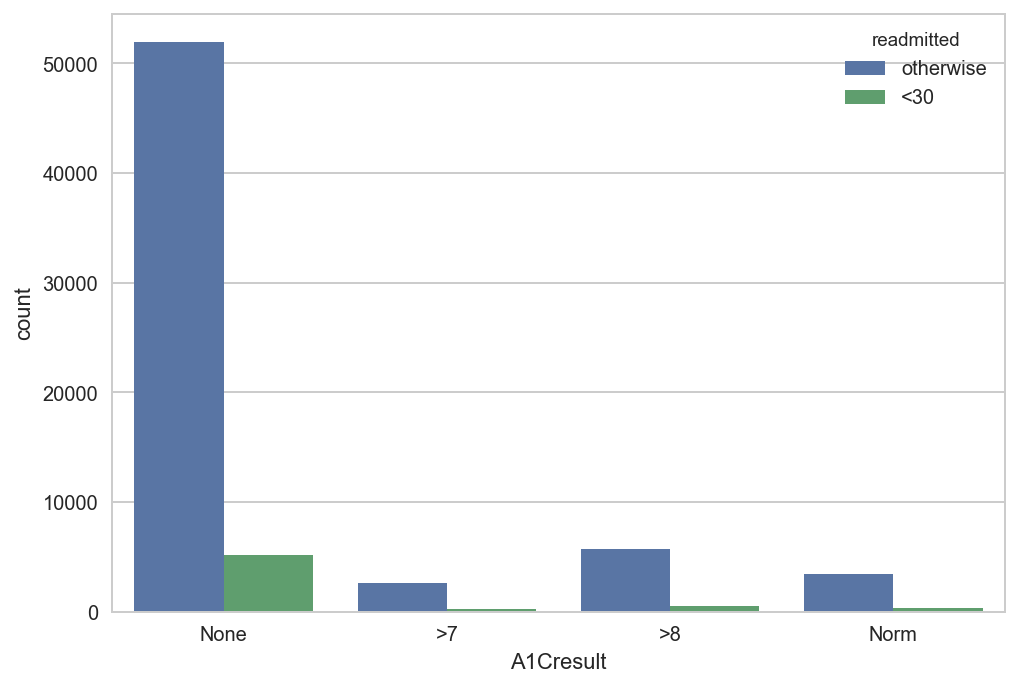

In [29]:
sns.countplot(x="A1Cresult",data = data_r , hue="readmitted")
plt.savefig('A1CResult.pdf')

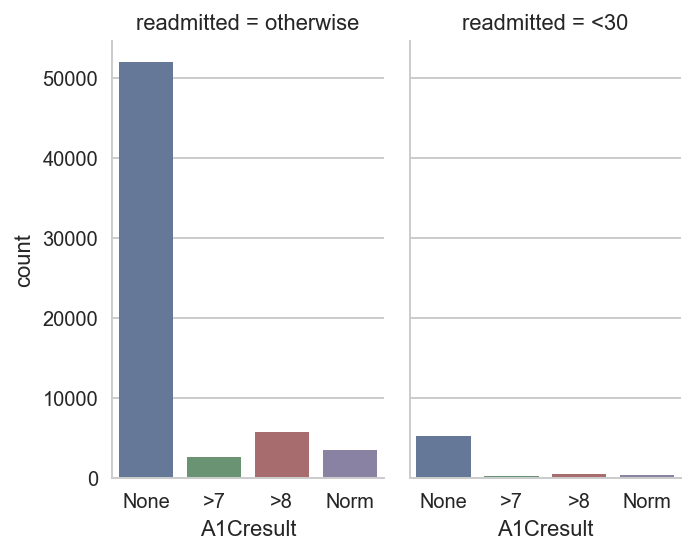

In [17]:
sns.factorplot(x="A1Cresult", col="readmitted",
...                    data=data_r, saturation=.5,
...                    kind="count", ci=None, aspect=.6)

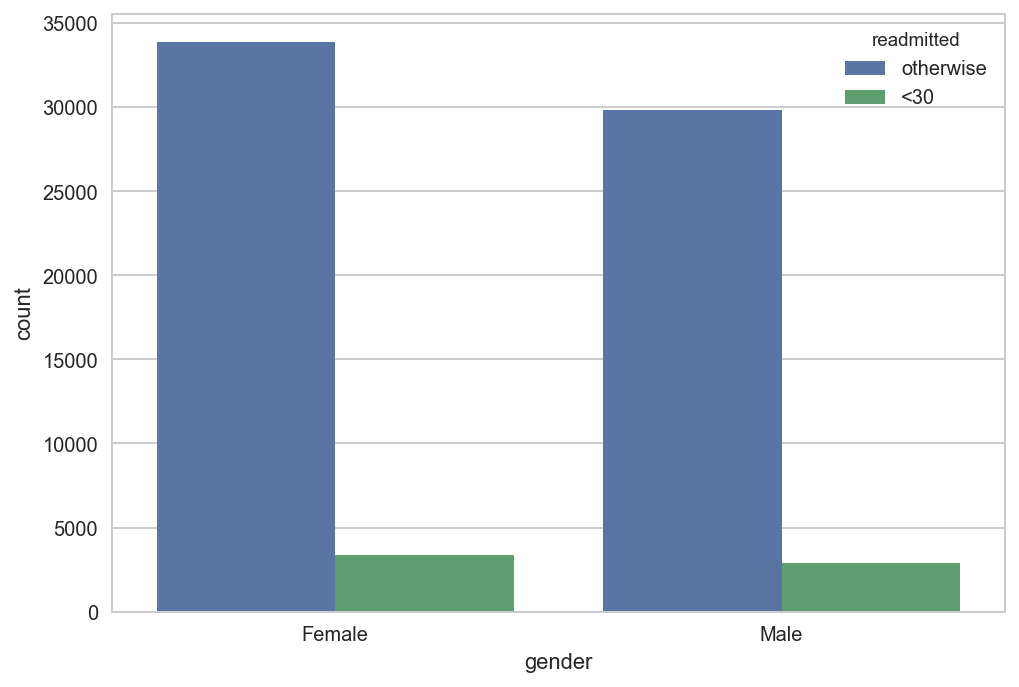

In [42]:
sns.countplot(x="gender",data = data_r[(data_r.gender == "Female") | (data_r.gender == "Male")] , hue="readmitted")
plt.savefig("gender.pdf")

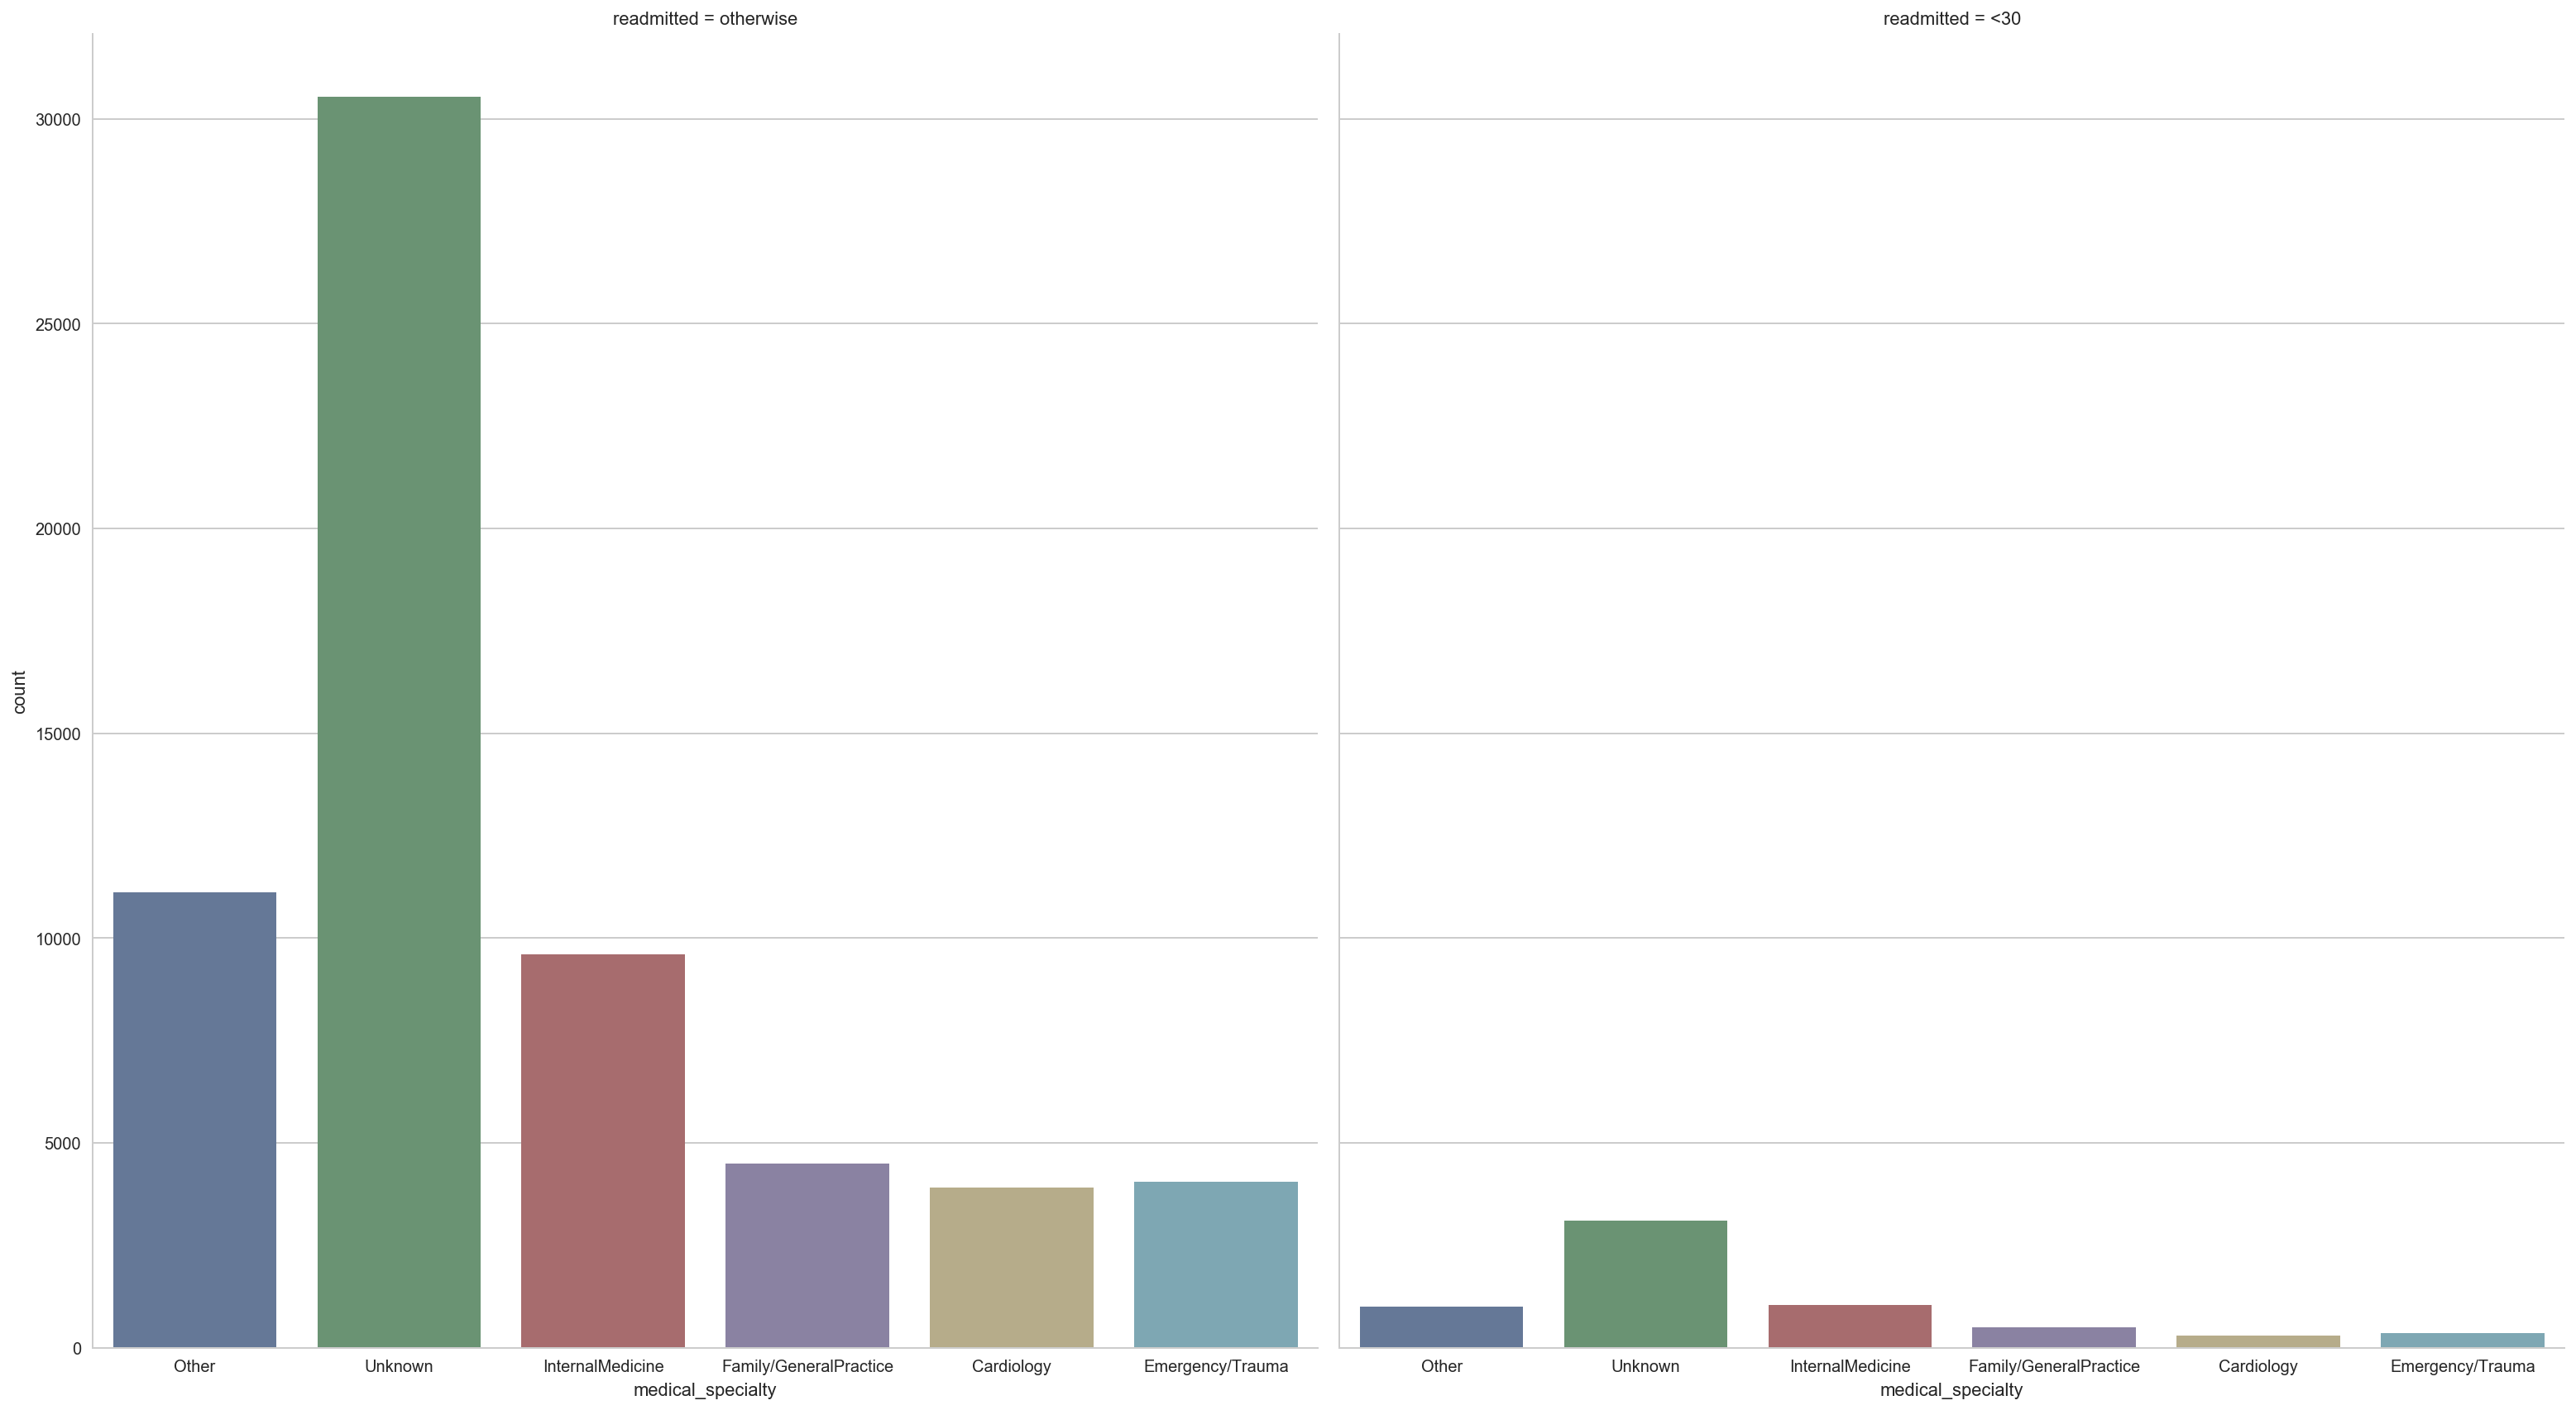

In [62]:
sns.factorplot(x="medical_specialty", col="readmitted",
                   data=data_r1, saturation=.5,
                    kind="count", ci=None, aspect=.9 ,size= 12)

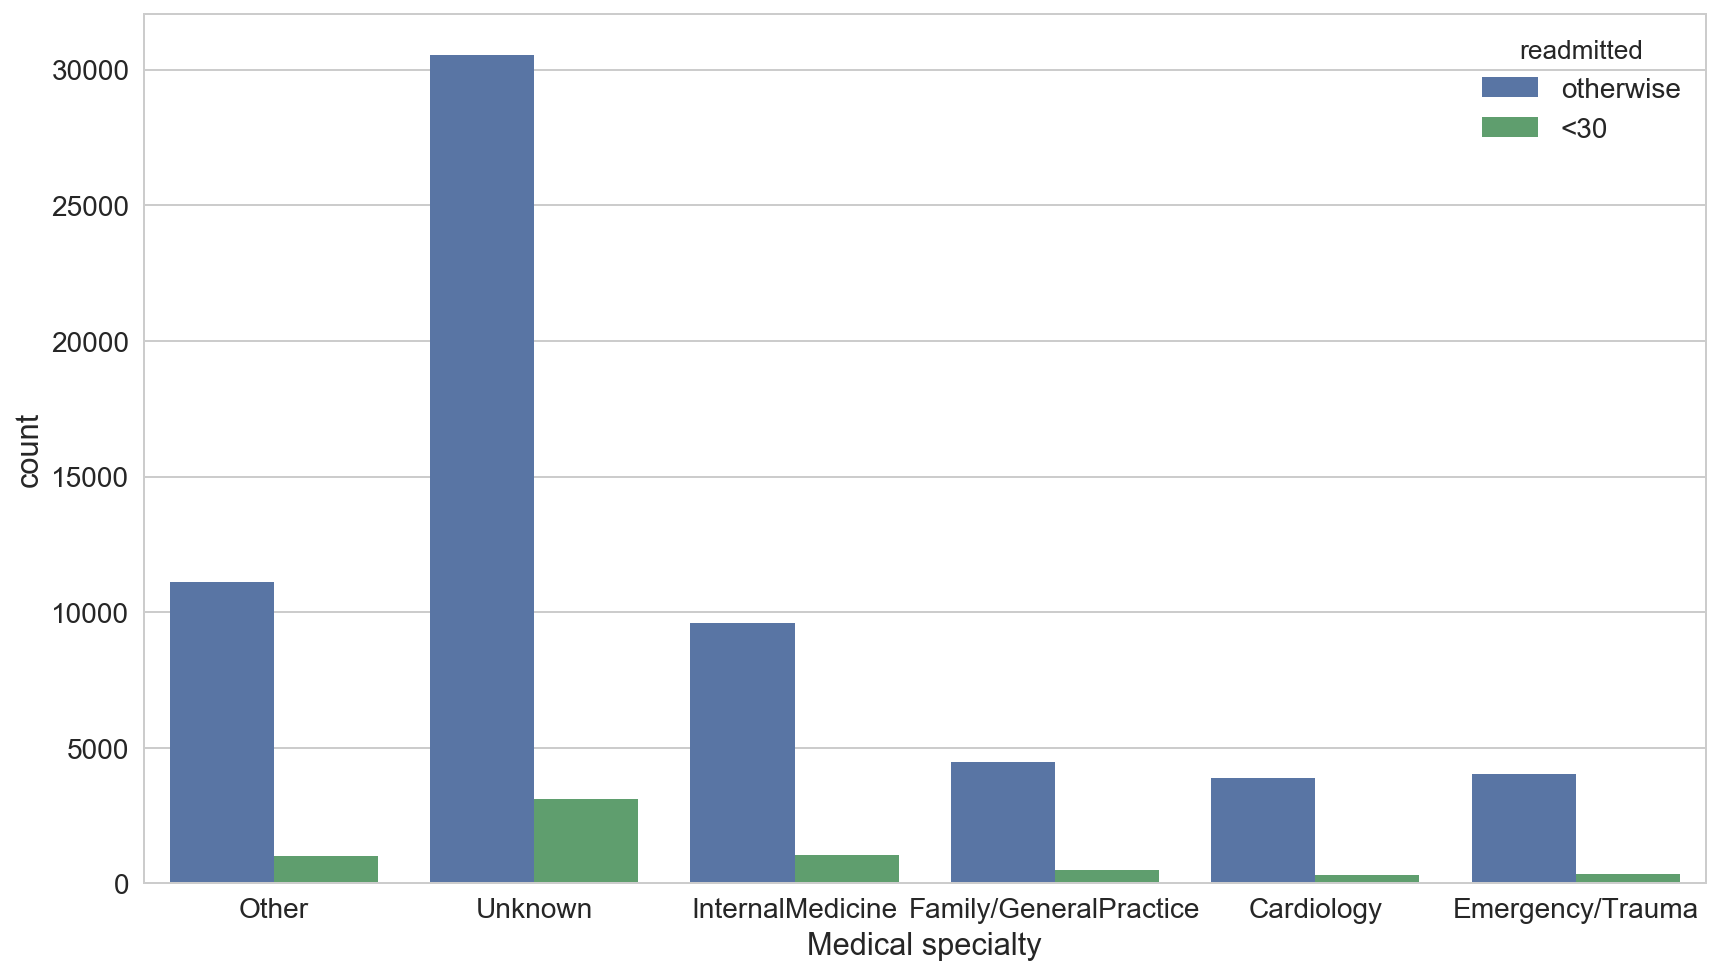

In [74]:
sns.set_context("notebook", font_scale=1.4)
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 14
sns.countplot(x="medical_specialty",data = data_r1 , hue="readmitted")
plt.xlabel("Medical specialty")
plt.tight_layout
plt.savefig('med_spec.pdf')

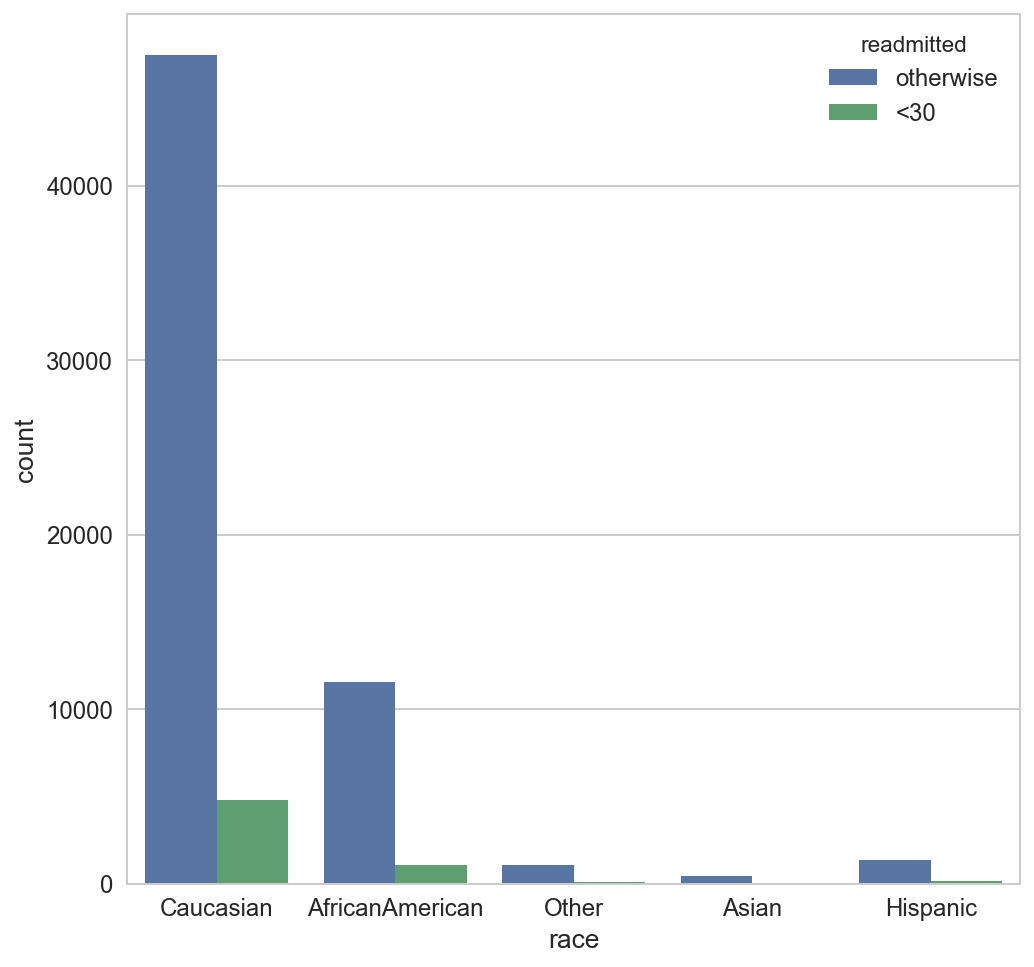

In [80]:
sns.set_context("notebook", font_scale=1.2)
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
sns.countplot(x="race",data = data_r , hue="readmitted")
plt.savefig('race.pdf')